In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statistics import *
import collections
import tqdm
plt.style.use('Solarize_Light2') # Функция для задания стиля графикам

In [55]:
data = pd.read_excel('data1.xlsx', sheet_name = '1') # читаем из файла все выборки 
data # выводим их

,first,second,third,fourth,fifth,sixth,seventh
0,1.478837,3.524742,10.688410,8.762075,-0.639073,7,5
1,1.001225,0.704558,13.948562,8.406540,1.338411,4,7
2,12.442777,9.485070,11.323363,6.717878,11.860927,3,3
3,7.258455,4.063322,6.812343,9.374129,4.627152,4,12
4,2.847905,2.474827,13.001960,6.004247,3.497351,7,9
...,...,...,...,...,...,...,...
495,12.652488,5.980685,11.551907,15.599527,0.413245,3,16
496,3.017953,5.027926,1.647249,6.883272,16.401325,3,12
497,15.229314,7.827465,6.470981,4.492946,5.352318,3,12
498,7.899367,1.921087,10.150870,6.701511,7.854305,4,8


1, 2, 3, 4 - нормальные распределения (Среднее ~ медиана; Эксцесс и ассиметрия ~ 0; На гистограмме вид нормального распределения)

    1 - m = 5  s = 7.1

    2 - m = 5.8  s = 5

    3 - m = 7.1  s = 5.1

    4 - m = 6.8  s = 3.1

5 - равномерное расределение (Эксцесс ~ 1,2 ассиметрия ~ 0; Мат ожидание ~ (min+max)/2; Дисперсия ~ (max-min)^2 / 2)

    a = -3.960927; b = 17.665563

6 - Пуассоновское распределение (мат. ожидание ~ дисперсии, дискретная выборка)

    k = 13   lamda = 5

7 - Биномиальное (исключительно по гистограмме)

# Задание 1

Хи-квадрат тест:
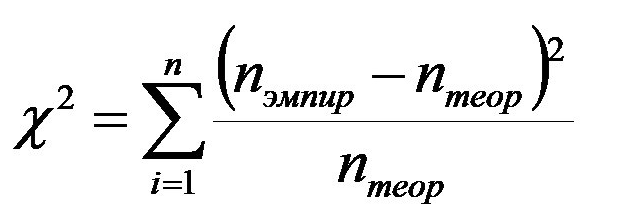

Колмагоров-смиирнов:
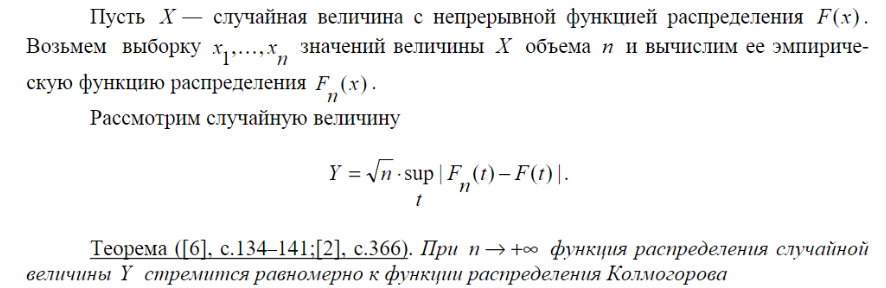

In [56]:
def get_freqs(values, inv_func, mean=10):
    
    assert inv_func is not None

    length = len(values)
    m = length // mean
    mean = length / m
    freqs = np.empty(m)
    x_values = np.array([inv_func(p) for p in np.linspace(0, 1, m+1)])
    
    freqs[0] = ((values >= x_values[0]) & (values <= x_values[1])).sum()
    for i, (lower_bound, upper_bound) in enumerate(zip(x_values[1:-1], x_values[2:])):
            freqs[i + 1] = ((values > lower_bound) & (values <= upper_bound)).sum()
            
    return freqs, mean

In [86]:
names = list(data)
num_bins = 10  # Количество интервалов для дискретизации
norm = names[0:4]
p_values = []
np.random.seed(18)
for name in norm:
    normal = stats.norm.ppf #* stdev(data[name]) + mean(data[name])
    freqs, mean = get_freqs((data[name]-data[name].mean()) / stdev(data[name]), normal, num_bins)
    expected_freqs = np.ones_like(freqs) * mean

    statistic, p_value = stats.chisquare(freqs, expected_freqs)
    p_values.append(p_value)
# p_values

In [87]:
observed, bins = np.histogram(data['fifth'], bins=15)
statistic, p_value = stats.chisquare(observed)
p_values.append(p_value)
# p_values

In [88]:
pois = stats.poisson.rvs (mu=5, size=500)
expected, bins = np.histogram(pois, bins=num_bins)
observed, bins1 = np.histogram(data['sixth'], bins=bins)
statistic, p_value = stats.chisquare(observed, expected)
p_values.append(p_value)
# p_values

In [89]:
binom = np.random.normal(loc=(data['seventh'].mean()), scale=2.419775, size=10000)
expected, bins = np.histogram(binom, bins=15)
observed, bins = np.histogram(data['seventh'], bins=bins)
statistic, p_value = stats.chisquare(observed, expected/20)
p_values.append(p_value)
# p_values

In [90]:
ks_values = np.zeros(7)
val = data['fifth']
val = (val - val.min()) / (val.max() - val.min())
a,p = stats.kstest(val, 'uniform')
ks_values[4] = p

In [91]:
i = 0
for name in norm:
    mu = data[name].mean()
    sigma = stdev(data[name])
    a,p = stats.kstest((data[name] - mu) / sigma, 'norm')
    ks_values[i] = p
    i+=1
# list(ks_values)

In [92]:
table = {'Chi-Squared test':[], 'KS test':[]}
columns = ['Chi-Squared test', 'KS test']
for i in range(len(p_values)):
    table[columns[0]].append(p_values[i])
    table[columns[1]].append(list(ks_values)[i])
# table

In [93]:
first_table = pd.DataFrame(table)
first_table.reset_index()
# for i in range(0,len(names)):
#     print(names[i])
#     first_table.rename(index = {int(i):names[i]})
first_table.rename(index = {5:names[5],
0:names[0],
2:names[2],
1:names[1],
3:names[3],
4:names[4],
6:names[6]})

,Chi-Squared test,KS test
first,5.954953e-01,0.988026
second,3.949161e-01,0.527676
third,2.460336e-01,0.690383
fourth,5.627664e-01,0.705422
fifth,5.982722e-01,0.498155
sixth,1.808214e-02,0.000000
seventh,6.622430e-09,0.000000


Для дискретных выборок по определению КС тест не применяется, как и Хи-квадрат, что видно по получившимся значениям, в остальном p_value соответствует уровню значимости 0,05, следовательно можно считать, что распределения соответсвуют предсказанным.

# Задание 2

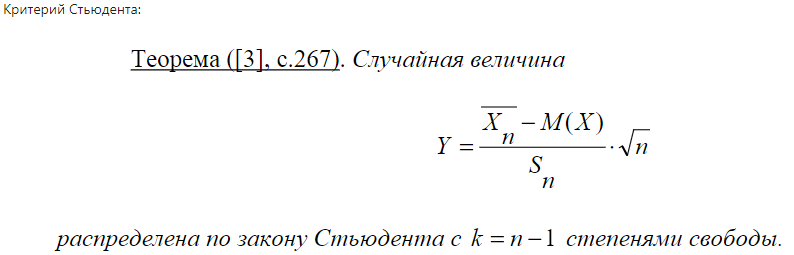

In [65]:
table_second = {'variable': [], 'T-test pvalue': [], 'ttest accepted': []}
for col in data.columns:
    mu = data[col].mean()
    res_ttest = stats.ttest_1samp(data[col], round(mu))
    table_second['variable'].append(col)
    table_second['T-test pvalue'].append(res_ttest.pvalue)
    table_second['ttest accepted'].append((res_ttest.pvalue > 0.05))
    # print(res_ttest)
    # print()

In [66]:
second_table = pd.DataFrame(table_second)
second_table = second_table.set_index('variable')
second_table

,T-test pvalue,ttest accepted
variable,,
first,0.989667,True
second,0.272667,True
third,0.567034,True
fourth,0.104883,True
fifth,0.472152,True
sixth,0.825747,True
seventh,0.853448,True


Можно сделать вывод, что можно использовать округлённое значение среднего как мат. ожидание, чем больше округление и размер округления превышает стандартную ошибку, целесобразность такого решения резко падает.

# Задание 3

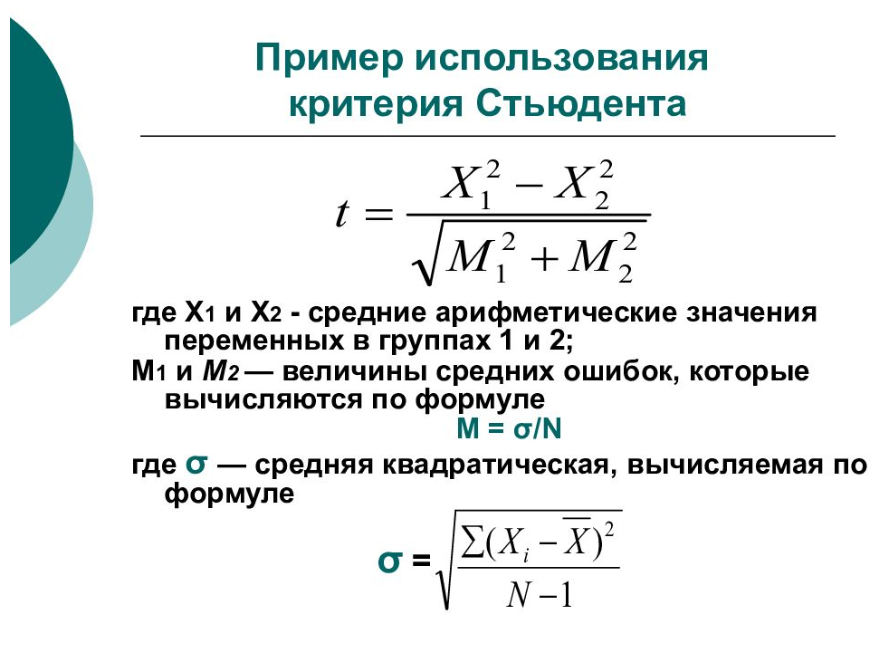
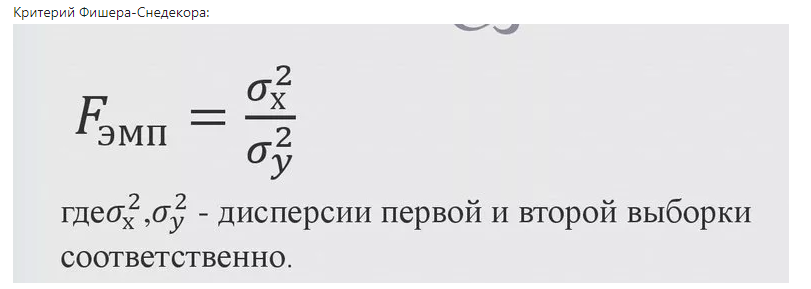

In [67]:
def fischersnedekortest(value1, value2):
    statistic = (np.std(value1, ddof=1) / np.std(value2,ddof=1))**2
    pvalue = stats.f.sf(statistic, len(value1) - 1, len(value2) - 1)
    return {'statistic':statistic, 'pvalue':pvalue}

In [68]:
table_third = {'pairs of variables': [], 'T-test pvalue': [], 'ttest accepted': [], 'Fisher-Snedekor pvalue': [], 'fisher accepted': []}

for i in range(len(norm)):
    for j in range(i + 1, len(norm)):
        res_ttest = stats.ttest_ind(data[norm[i]], data[norm[j]])
        res_fisher = fischersnedekortest(data[norm[i]], data[norm[j]])
        table_third['pairs of variables'].append(f'{norm[i]}, {norm[j]}')
        table_third['T-test pvalue'].append(res_ttest.pvalue)
        table_third['ttest accepted'].append((res_ttest.pvalue > 0.05))
        table_third['Fisher-Snedekor pvalue'].append(res_fisher['pvalue'])
        table_third['fisher accepted'].append((res_fisher['pvalue'] > 0.05))
        # print(f'{norm[i]}, {norm[j]}: {res_ttest}')
        # print(f'{norm[i]}, {norm[j]}: {res_fisher}')
        # print()

In [69]:
third_table = pd.DataFrame(table_third)
third_table = third_table.set_index('pairs of variables')
third_table

,T-test pvalue,ttest accepted,Fisher-Snedekor pvalue,fisher accepted
pairs of variables,,,,
"first, second",5.188850e-02,True,3.061430e-15,False
"first, third",6.082389e-08,False,1.953677e-14,False
"first, fourth",3.298373e-07,False,2.269340e-72,False
"second, third",1.718630e-05,False,5.965407e-01,True
"second, fourth",1.005526e-04,False,1.127562e-27,False
"third, fourth",1.840315e-01,True,8.851187e-29,False


# Задание 4

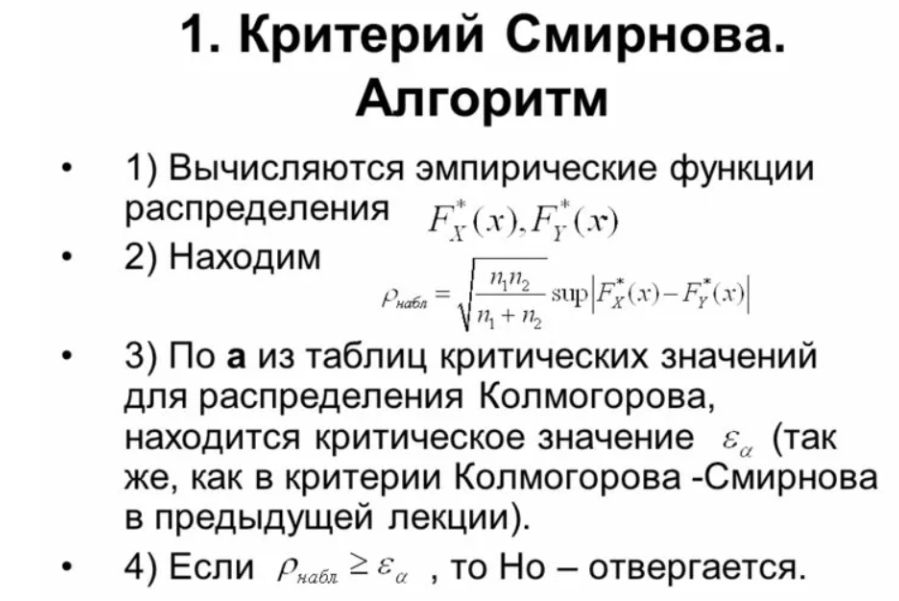
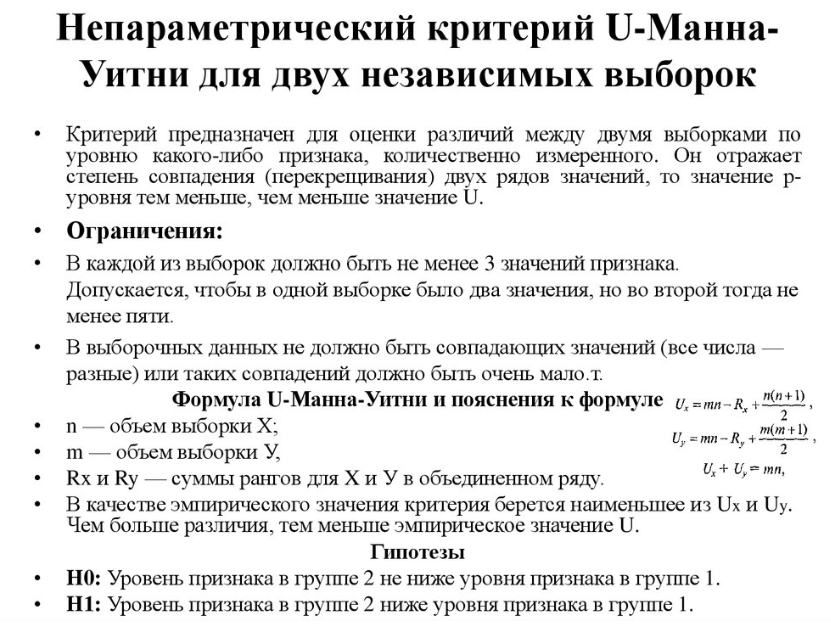
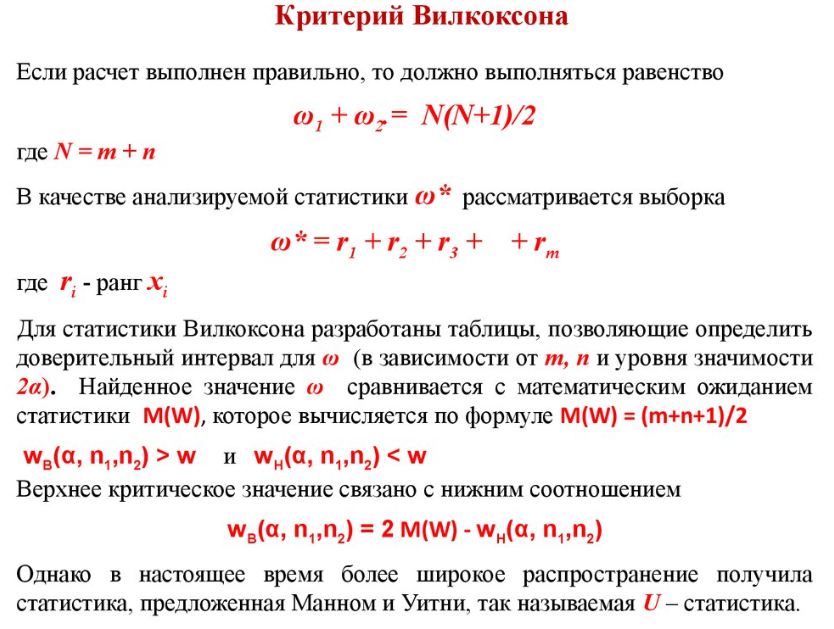

In [70]:
table_fourth = {'pairs of variables': [], 'Kolmogorov-Smirnov pvalue': [], 'ks accepted': [], 'Mann-Whitney pvalue': [], 'mw accepted': [], 'Wilcoxon pvalue': [], 'w accepted': []}

for i in range(len(norm)):
    for j in range(i + 1, len(norm)):
        res_ks = stats.ks_2samp(data[norm[i]], data[norm[j]])
        res_mw = stats.mannwhitneyu(data[norm[i]], data[norm[j]])
        res_w = stats.wilcoxon(data[norm[i]], data[norm[j]])
        table_fourth['pairs of variables'].append(f'{norm[i]}, {norm[j]}')

        table_fourth['Kolmogorov-Smirnov pvalue'].append(res_ks.pvalue)
        table_fourth['ks accepted'].append((res_ks.pvalue > 0.05))

        table_fourth['Mann-Whitney pvalue'].append(res_mw.pvalue)
        table_fourth['mw accepted'].append((res_mw.pvalue > 0.05))

        table_fourth['Wilcoxon pvalue'].append(res_w.pvalue)
        table_fourth['w accepted'].append((res_w.pvalue > 0.05))

        print(f'{norm[i]}, {norm[j]}: {res_ks}')
        print(f'{norm[i]}, {norm[j]}: {res_mw}')
        print(f'{norm[i]}, {norm[j]}: {res_w}')
        print()

first, second: KstestResult(statistic=0.13, pvalue=0.00042124348957333854, statistic_location=-1.581362868018914, statistic_sign=1)
first, second: MannwhitneyuResult(statistic=117295.0, pvalue=0.09157873156906797)
first, second: WilcoxonResult(statistic=56157.0, pvalue=0.045388596698339174)

first, third: KstestResult(statistic=0.21, pvalue=4.602215863108133e-10, statistic_location=3.0179529757151613, statistic_sign=1)
first, third: MannwhitneyuResult(statistic=101293.0, pvalue=2.0889921599986946e-07)
first, third: WilcoxonResult(statistic=45343.0, pvalue=8.961553759900692e-08)

first, fourth: KstestResult(statistic=0.296, pvalue=1.0169749397308431e-19, statistic_location=2.424367847997928, statistic_sign=1)
first, fourth: MannwhitneyuResult(statistic=101874.0, pvalue=4.105238329304692e-07)
first, fourth: WilcoxonResult(statistic=46954.0, pvalue=1.2458045062714203e-06)

second, third: KstestResult(statistic=0.14, pvalue=0.00010844915031869944, statistic_location=4.063321982044727, stat

In [71]:
fourth_table = pd.DataFrame(table_fourth)
fourth_table = fourth_table.set_index('pairs of variables')
fourth_table

,Kolmogorov-Smirnov pvalue,ks accepted,Mann-Whitney pvalue,mw accepted,Wilcoxon pvalue,w accepted
pairs of variables,,,,,,
"first, second",4.212435e-04,False,9.157873e-02,True,4.538860e-02,False
"first, third",4.602216e-10,False,2.088992e-07,False,8.961554e-08,False
"first, fourth",1.016975e-19,False,4.105238e-07,False,1.245805e-06,False
"second, third",1.084492e-04,False,1.182467e-05,False,9.770043e-06,False
"second, fourth",4.602216e-10,False,6.396515e-06,False,6.453782e-05,False
"third, fourth",1.975130e-06,False,4.065150e-01,True,3.568846e-01,True


# Задание 5

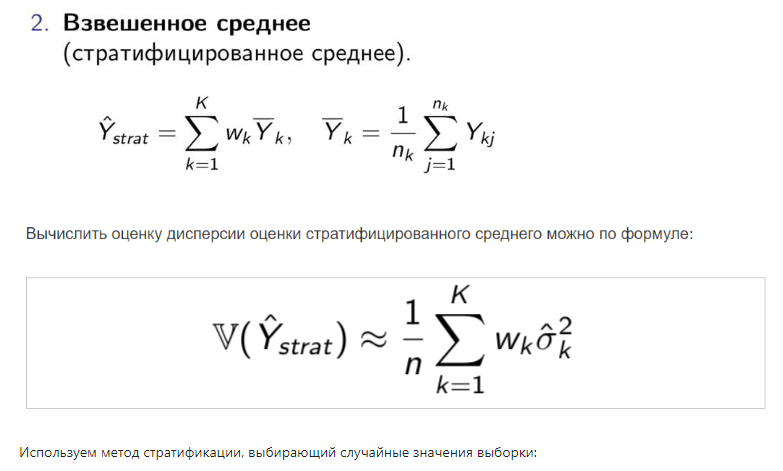

In [113]:
length = len(data)
table_fifth = {'variable': [], 'mean': [], 'mean_var': []}

len_1 = 200
len_2 = 300
for col in data.columns:
    means = []
    stdevs = []
    for i in range(1,452,50):
        group = data[col].values[i:i+49]
        means.append(np.mean(group))
        stdevs.append((np.var(group)/500)**0.5)
#     best_var = np.inf
#     best_mean = None
    # global_mean = data[col].mean()
    # w_1 = len_1/length
    # w_2 = len_2/length
    # means = []
    # se_acc = []
    # result = []
#     for i in tqdm.tqdm(range(500)):
#         for v in range(1, 6):
#             p = v / 10
#             N = length * p
#             positions = np.random.choice([0, 1], length, p=[p, 1-p])
#             values1 = data[col].values[positions==0]
#             values2 = data[col].values[positions==1]
#             mean = values1.mean()*p + values2.mean()*(1-p)
#             mean_var = (values1.var()*p + values2.var()*(1-p))/N
#             if mean_var < best_var:
#                 best_var = mean_var
#                 best_mean = mean
        # positions = np.random.choice([0, 1], length, p=[w_1, w_2])
        # sample_1 = data[col].values[positions==0]
        # sample_2 = data[col].values[positions==1]
        # var_strat = (np.var(sample_1)*w_1 + np.var(sample_2)*w_2)/length
        # sample_mean = (np.mean(sample_1)+np.mean(sample_2))/2
        # se_strat = np.sqrt(var_strat)
        # se_acc.append(se_strat)
        # inside = 1
        # if global_mean < (sample_mean - se_strat) or global_mean > (sample_mean + se_strat):
        #     indside = 0
        # result.append(inside)
        # means.append(sample_mean*inside)
#     print(stdevs)    
    table_fifth['variable'].append(col)
    table_fifth['mean'].append(np.mean(means))
    table_fifth['mean_var'].append(np.mean(stdevs))
    # table_fifth['mean'].append(sum(means)/sum(result))
    # table_fifth['mean_var'].append(np.mean(se_acc))
    # print(sum(result)/len(result))

fifth_table = pd.DataFrame(table_fifth)
fifth_table = fifth_table.set_index('variable')
fifth_table

,mean,mean_var
variable,,
first,4.957002,0.315488
second,5.740737,0.217484
third,7.109571,0.221394
fourth,6.803871,0.134147
fifth,7.200962,0.280334
sixth,4.963265,0.097783
seventh,10.006122,0.106660


In [114]:
orig = {'original mean': data.mean(), 'original mean_var': data.sem()}
orig = pd.DataFrame(orig)
pd.concat([orig, fifth_table], axis=1)

,original mean,original mean_var,mean,mean_var
first,4.995870,0.318739,4.957002,0.315488
second,5.754075,0.223944,5.740737,0.217484
third,7.129688,0.226409,7.109571,0.221394
fourth,6.778237,0.136505,6.803871,0.134147
fifth,7.204123,0.283690,7.200962,0.280334
sixth,4.978000,0.099875,4.963265,0.097783
seventh,9.980000,0.108216,10.006122,0.106660


# Задание 6

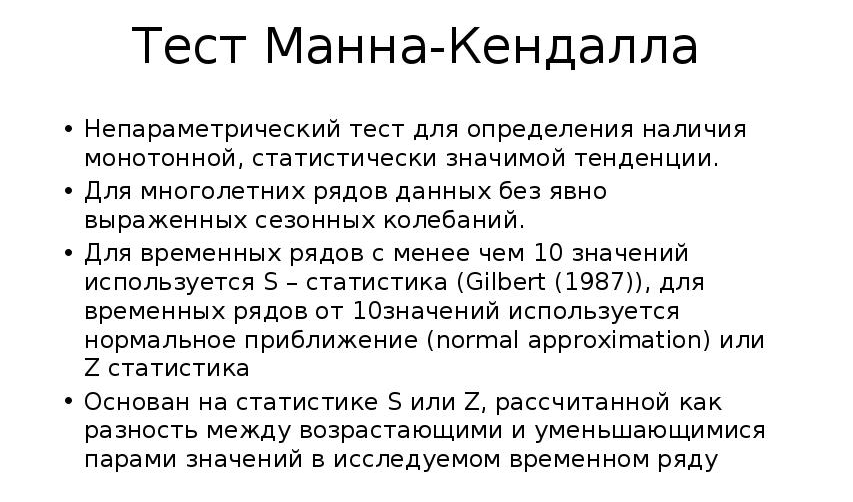

In [74]:
!pip install pymannkendall

In [75]:
import pymannkendall as mk
for col in data.columns:
    print(mk.original_test(data[col]))
    print()

Mann_Kendall_Test(trend='no trend', h=False, p=0.7181750164567118, z=-0.3608989126618225, Tau=-0.01080561122244489, s=-1348.0, var_s=13930414.666666666, slope=-0.0008442710233395978, intercept=5.208234322495154)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.012029130781907149, z=-2.5112886052027186, Tau=-0.07514228456913828, s=-9374.0, var_s=13930412.666666666, slope=-0.004076921566642587, intercept=6.6161047673954645)

Mann_Kendall_Test(trend='no trend', h=False, p=0.1530445574457595, z=-1.4288597174379705, Tau=-0.04275751503006012, s=-5334.0, var_s=13930412.666666666, slope=-0.002274362089450941, intercept=7.360654141331447)

Mann_Kendall_Test(trend='no trend', h=False, p=0.9647385120602587, z=-0.04420811686213801, Tau=-0.0013306613226452906, s=-166.0, var_s=13930408.666666666, slope=-3.897479376992504e-05, intercept=6.854285882170717)

Mann_Kendall_Test(trend='no trend', h=False, p=0.9747786854809974, z=0.03161549608212594, Tau=0.0009539078156312625, s=119.0, var_s=13930413.666

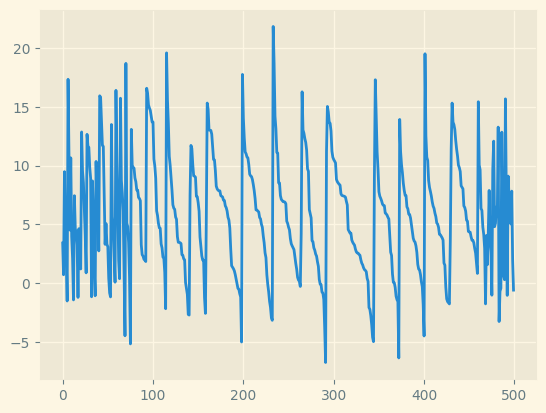

In [76]:
plt.plot(data['second'])

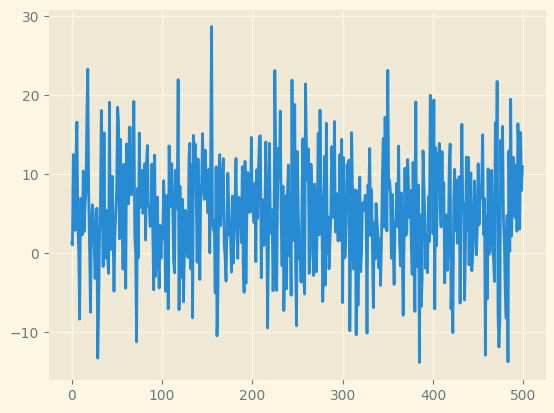

In [77]:
plt.plot(data['first'])

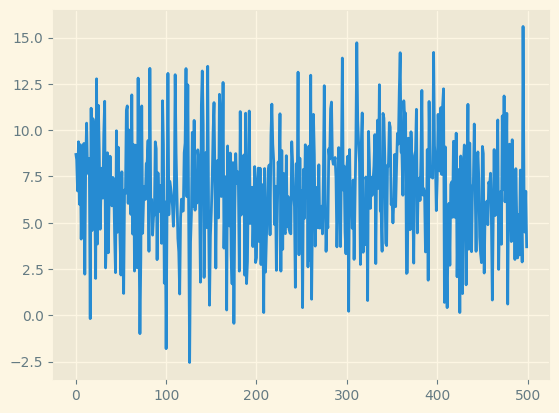

In [78]:
plt.plot(data['fourth'])